# **Importing Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2024-10-07 13:15:30--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.110, 18.164.173.58, 18.164.173.117, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  19.4MB/s    in 0.2s    

2024-10-07 13:15:30 (19.4 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [3]:
df = pd.read_csv("netflix.csv") #reading the csv and saving it as df

# **Understanding/Observing the Data.**

In [4]:
df.shape #To roughly understand the DF size. (i.e. the no. of enteries and the no. of colums we have in the DF.)

(8807, 12)

There are 8807 rows and 12 columns in the data set.

In [5]:
df.columns #To understand the name of columns in the data we have.
           #The same details are mentioned in the test case but its always better to know the headers and colums

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info() #To understand the data type that each column is holding also this gives us count of non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.head(5) #To have a rough look at data and understand the information that each column is holding.
           #which is pretty self explainatory by the column name.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.duplicated().sum() #To check if there is any duplicate data.

0

In [9]:
df.isna().sum() #To count the NaN values in each column to help us clean/correct the data and make the data more reliable.

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [10]:
df.nunique() #To check the number of unique enteries in each column.

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [11]:
df.describe().T #To understand the range of release year on the time line.
                #Also gives us an idea that the data includes Movies/TV series between 1925 - 2021
                #Since release_year is the only Numeric column hence we only get the breakdown for "release_year"

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [12]:
df.type.unique() #Checking unique enteries in type column

array(['Movie', 'TV Show'], dtype=object)

In [13]:
df.rating.unique() #Checking unique enteries in rating column

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

> As we can see that there are few duration value in Rating which could be a mistake and could also the reason for missing values in Duration column. Rest of the columns have several data to check for unique enteries as most of the field are have concated values.

# **Cleaning Data**

In [14]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


> As we can see that our guess was right. So lets correct this entry.

In [15]:
d_index = df[df.duration.isna()].index #Maintaining the iloc for further reference post correcting the NA data.
df.loc[d_index] = df.loc[d_index].fillna(method = 'ffill' , axis = 1) #copying the value from "rating" to "duration" using ffill.
df.loc[d_index]

<ipython-input-15-8ff5b7e04624>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[d_index] = df.loc[d_index].fillna(method = 'ffill' , axis = 1) #copying the value from "rating" to "duration" using ffill.
<ipython-input-15-8ff5b7e04624>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2017 2010 2015]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[d_index] = df.loc[d_index].fillna(method = 'ffill' , axis = 1) #copying the value from "rating" to "duration" using ffill.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [16]:
#Now we need to remove the incorrect values from "rating". Hence replaced the incorrect data with "Not Available"
df.loc[d_index ,'rating'] = 'Not Available'
df.loc[d_index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


In [17]:
# Replacing the null values in country column.
c_index = df[df.country.isna()].index #Maintaining the iloc for further reference post correcting the NA data.
df.loc[c_index ,'country'] = "Unknown"
#df1 = df['country'].fillna("Unknown")
df.loc[c_index].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


In [18]:
# Replacing the null values in director column.
d_index = df[df.director.isna()].index
df.loc[d_index ,'director'] = "Unknown"
df.loc[d_index].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,Unknown,NaN,Unknown,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...


In [19]:
# Replacing the null values in cast column.
cst_index = df[df.cast.isna()].index
df.loc[cst_index ,'cast'] = "Unknown"
df.loc[cst_index].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,Unknown,Unknown,Unknown,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Unknown,Unknown,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...


In [20]:
# Replacing the null values in rating column.
r_index = df[df.rating.isna()].index
df.loc[r_index ,'rating'] = "Not Available"
df.loc[r_index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [21]:
# Checking null values in date_added column. We can not replace them with any value or with "Unavailable"/"Unknown".
# Since that would be a string and we wonth be able to perform date time operations on them.
df[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


> No More Missing/Incorrect enteries that can be replaced or corrected.

# **Exploring & Modifying Data**

In [22]:
df.rating.value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [23]:
df['date_added'].value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"December 4, 2016",1
"November 21, 2016",1
"November 19, 2016",1


> Generating different tables for analysis.

In [24]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [25]:
#Director table for analysis
dir_table = df[['show_id' , 'type' , 'director']]
dir_table['director'] = dir_table['director'].apply(lambda x : x.split(', '))
dir_table = dir_table.explode('director')
dir_table

<ipython-input-25-a6dd779ebbf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_table['director'] = dir_table['director'].apply(lambda x : x.split(', '))


,show_id,type,director
0,s1,Movie,Kirsten Johnson
1,s2,TV Show,Unknown
2,s3,TV Show,Julien Leclercq
3,s4,TV Show,Unknown
4,s5,TV Show,Unknown
...,...,...,...
8802,s8803,Movie,David Fincher
8803,s8804,TV Show,Unknown
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [26]:
#Cast table for analysis
cast_table = df[['show_id' , 'type' ,'cast']]
cast_table.dropna(inplace = True)
cast_table['cast'] = cast_table['cast'].apply(lambda x : x.split(', '))
cast_table = cast_table.explode('cast')
cast_table

<ipython-input-26-cf07c3272153>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_table.dropna(inplace = True)
<ipython-input-26-cf07c3272153>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_table['cast'] = cast_table['cast'].apply(lambda x : x.split(', '))


,show_id,type,cast
0,s1,Movie,Unknown
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [27]:
#Country table for analysis
country_table = df[['show_id' , 'type' , 'country']]
country_table['country'] = country_table['country'].apply(lambda x : x.split(', '))
country_table = country_table.explode('country')
country_table

<ipython-input-27-60aaceeb27e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_table['country'] = country_table['country'].apply(lambda x : x.split(', '))


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,Unknown
3,s4,TV Show,Unknown
4,s5,TV Show,India
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,Unknown
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [28]:
#Genre table for analysis
genre_table = df[['show_id' , 'type', 'listed_in']]
genre_table['listed_in'] = genre_table['listed_in'].apply(lambda x : x.split(','))
genre_table = genre_table.explode('listed_in')
genre_table

<ipython-input-28-8c7381f14549>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_table['listed_in'] = genre_table['listed_in'].apply(lambda x : x.split(','))


,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [29]:
date_table = df
date_table["date_added"] = pd.to_datetime(date_table["date_added"],format ='mixed') #Changing the date format for "date_added" for analysis.
date_table = date_table.dropna(subset=['date_added'])

In [30]:
#Adding day and month for better analysis.
date_table["added_day"] = date_table["date_added"].dt.day_name()
date_table["added_month"] = date_table["date_added"].dt.month_name()
date_table["added_year"] = date_table["date_added"].dt.year.astype(int)

<ipython-input-30-ab83e7d1f24f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_table["added_day"] = date_table["date_added"].dt.day_name()
<ipython-input-30-ab83e7d1f24f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_table["added_month"] = date_table["date_added"].dt.month_name()
<ipython-input-30-ab83e7d1f24f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [31]:
date_table.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_day,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Saturday,September,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Friday,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Friday,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Friday,September,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Friday,September,2021


# **Non Graphical Analysis**

> **Country Analysis**

In [32]:
country_table.country.nunique() #Total Countries that Netflix is present/produces in.

128

In [33]:
country_table.country.value_counts().head(11) #Top 10 content creating countries. Ignoring the Unknown data.

,count
country,
United States,3689
India,1046
Unknown,831
United Kingdom,804
Canada,445
France,393
Japan,318
Spain,232
South Korea,231


In [34]:
country_content= country_table.groupby(['country' , 'type'])['show_id'].count().reset_index()
country_content_movie = country_content.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)
country_content_tv = country_content.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('TV Show',ascending = False)

In [35]:
country_content_movie.head(6) #Top 5 Countries in Movie production. Ignoring the Unknown data.

type,Movie,TV Show
country,,
United States,2751.0,938.0
India,962.0,84.0
United Kingdom,532.0,272.0
Unknown,440.0,391.0
Canada,319.0,126.0
France,303.0,90.0


In [36]:
country_content_tv.head(6) #Top 5 Countries in TV Show production. Ignoring the Unknown data.

type,Movie,TV Show
country,,
United States,2751.0,938.0
Unknown,440.0,391.0
United Kingdom,532.0,272.0
Japan,119.0,199.0
South Korea,61.0,170.0
Canada,319.0,126.0




> **Director Analysis**


In [37]:
dir_table.director.nunique() #Total number of directors whose content is available on Netflix.

4994

In [38]:
dir_table.director.value_counts().head(11) #Top 10 content creating directors. Ignoring the Unknown data.

,count
director,
Unknown,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12


In [39]:
director_content = dir_table.groupby(['director' , 'type'])['show_id'].count().reset_index()
director_content_mov = director_content.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)
director_content_tv = director_content.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('TV Show' ,ascending = False)

In [40]:
director_content_mov.head(6) #Top 5 Directors in Movie production. Ignoring the Unknown data.

type,Movie,TV Show
director,,
Unknown,188.0,2446.0
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0


In [41]:
director_content_tv.head(6) #Top 5 Director in TV Show production. Ignoring the Unknown data.

type,Movie,TV Show
director,,
Unknown,188.0,2446.0
Ken Burns,2.0,3.0
Alastair Fothergill,1.0,3.0
Stan Lathan,2.0,2.0
Joe Berlinger,3.0,2.0
Hsu Fu-chun,NaN,2.0




> **Cast Analysis**



In [42]:
cast_table.cast.nunique() #Total number of casts whose content is available on Netflix.

36440

In [43]:
cast_table.cast.value_counts().head(11) #Top 10 content creating cast. Ignoring the Unknown data.

,count
cast,
Unknown,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Akshay Kumar,30
Om Puri,30


In [44]:
cast_content = cast_table.groupby(['cast' , 'type'])['show_id'].count().reset_index()
cast_content_tv = cast_content.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)
cast_content_mov = cast_content.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('Movie' , ascending = False)

In [45]:
cast_content_mov.head(6) #Top 5 Cast in Movie production. Ignoring the Unknown data.

type,Movie,TV Show
cast,,
Unknown,475.0,350.0
Anupam Kher,42.0,1.0
Shah Rukh Khan,35.0,NaN
Naseeruddin Shah,32.0,NaN
Om Puri,30.0,NaN
Akshay Kumar,30.0,NaN


In [46]:
cast_content_tv.head(6) #Top 5 Cast in TV Show production. Ignoring the Unknown data.

type,Movie,TV Show
cast,,
Unknown,475.0,350.0
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0




> **Run-time/Duration Analysis**



In [47]:
movies.duration.value_counts().head(10)

,count
duration,
90 min,152
94 min,146
97 min,146
93 min,146
91 min,144
95 min,137
96 min,130
92 min,129
102 min,122


In [48]:
tv_shows.duration.value_counts().head(10)

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9




> **Rating Analysis for both Movie and TV shows**



In [49]:
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 75
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
         UR                  3
TV Show  NR                  5
         Not Available       2
         R                   2
         TV-14             733
         TV-G               94
         TV-MA            1145
         TV-PG             323
         TV-Y              176
         TV-Y7             195
         TV-Y7-FV            1
Name: show_id, dtype: int64



> **Genre Analysis**



In [50]:
genre_table.listed_in.nunique() #Total type of genre that Netflix has

73

In [51]:
genre_table.query('type == "Movie"')['listed_in'].value_counts().head(10) #Top 10 Genre for Movies.

,count
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
Independent Movies,736
Romantic Movies,613
Children & Family Movies,605


In [52]:
genre_table.query('type == "TV Show"')['listed_in'].value_counts().head(10) #Top 10 Genre for TV Shows.

,count
listed_in,
International TV Shows,774
TV Dramas,696
International TV Shows,577
TV Comedies,461
Crime TV Shows,399
Kids' TV,388
Romantic TV Shows,338
British TV Shows,253
Docuseries,221


# **Visual Analysis**

> Movies Vs TV Shows.

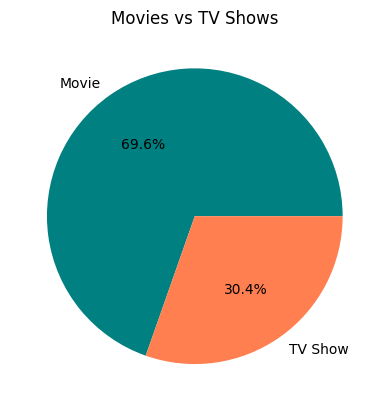

In [53]:
type_pie = df.type.value_counts()
plt.pie(type_pie,  labels=type_pie.index, autopct='%1.1f%%' , colors = ['teal' , 'coral'])
plt.title('Movies vs TV Shows')
plt.show()



> Movies & TV Shows added to Netflix across the year.



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


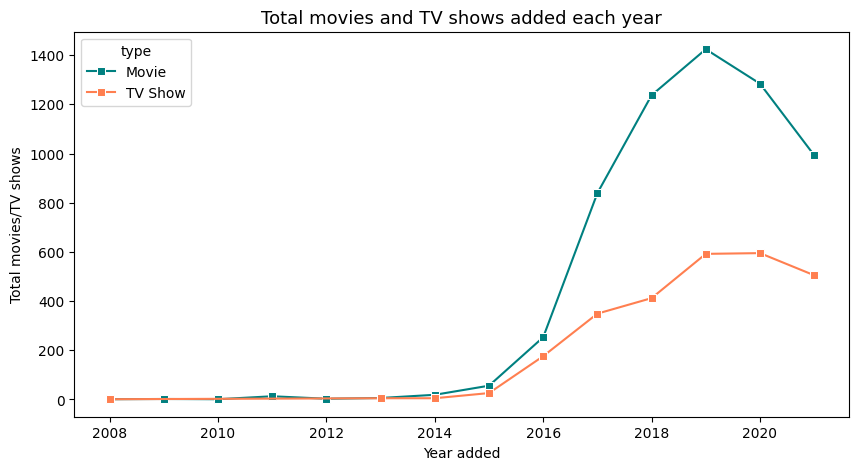

In [54]:
year_graph = date_table.groupby(['added_year' ,'type' ])['show_id'].count().reset_index()
year_graph.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

plt.figure(figsize = (10,5))
sns.lineplot(data = year_graph , x = 'added_year' , y = 'total movies/TV shows' , hue = 'type', marker = 's'  , ms = 6, palette=['#008080', '#FF7F50'])
plt.xlabel('Year added' , fontsize = 10)
plt.ylabel('Total movies/TV shows' , fontsize = 10)
plt.title('Total movies and TV shows added each year' , fontsize = 13)
plt.show()



> Top 10 years where most Movies and TV Shows were added.



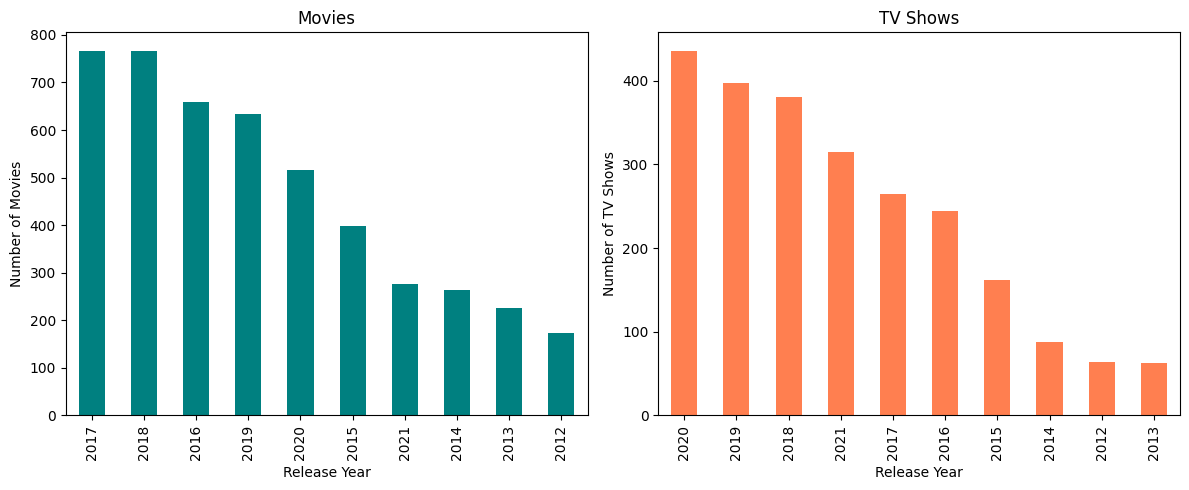

In [55]:
movie_graph = movies['release_year'].value_counts().head(10)
tv_graph = tv_shows['release_year'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

movie_graph.plot(kind='bar', color='teal', ax=axes[0])
axes[0].set_title('Movies')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Number of Movies')

tv_graph.plot(kind='bar', color='coral', ax=axes[1])
axes[1].set_title('TV Shows')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Number of TV Shows')

plt.tight_layout()
plt.show()

**Observation from Line Plot & Bar graph:**
1.  The content added on the Netflix drastically increased post 2014 with the peak near 2019.
2.  Recently in 2020 and 2021 we can see a drop in content added mostly in movies, Suspecting possibly because of Covid. Also the production of new Movies/TV Shows might have drastically reduced if not stopped post 2019.
3. Highest Movie & TV Show release was in 2018-2019.
4. We can observe a drop in movies and rise in TV shows post 2017-2018.
3. TV shows surpassed the movies in 2020 i.e. post covid. Recently TV shows are being consumed and produced more than Movies.



> Top 10 Directors with most content. [Ignoring the Unknown data]



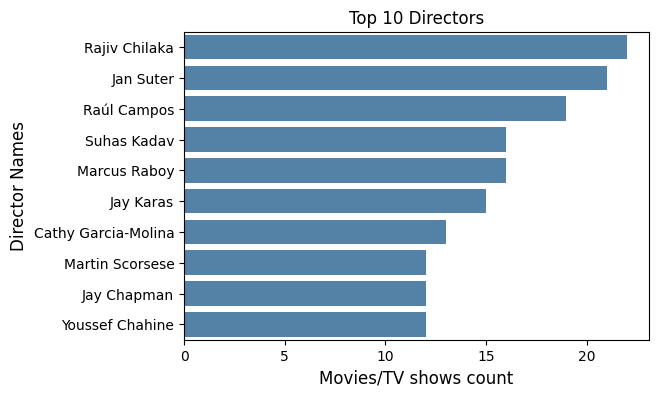

In [56]:
top_11_d = dir_table.director.value_counts().head(11).index #including 11 entries as there are many entries with Unknown Directors.
top_10_d = top_11_d.drop('Unknown') #Dropping the Unknown entries.
dir_graph = dir_table.loc[dir_table['director'].isin(top_10_d)]

plt.figure(figsize= (6,4))
sns.countplot(data = dir_graph , y = 'director' , order = top_10_d , orient = 'v', color='#4682B4')
plt.xlabel('Movies/TV shows count' , fontsize = 12)
plt.ylabel('Director Names' , fontsize = 12)
plt.title('Top 10 Directors')
plt.show()



> Top 10 Casts with most content. [Ignoring the Unknown data]



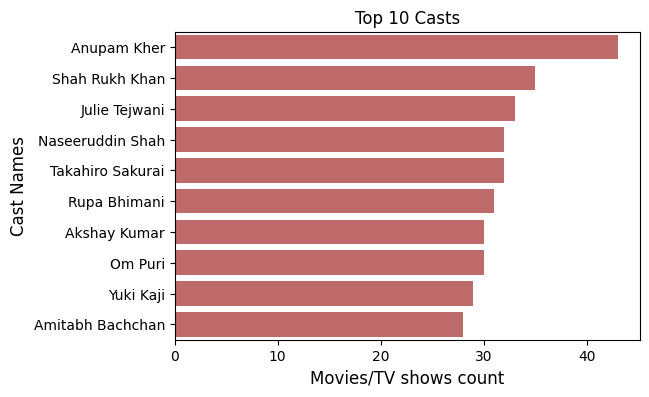

In [57]:
top_11_c = cast_table.cast.value_counts().head(11).index #including 11 entries as there are many entries with Unknown Casts.
top_10_c = top_11_c.drop('Unknown') #Dropping the Unknown entries.
cast_graph = cast_table.loc[cast_table['cast'].isin(top_10_c)]

plt.figure(figsize= (6,4))
sns.countplot(data = cast_graph , y = 'cast' , order = top_10_c , orient = 'v', color='#CD5C5C')
plt.xlabel('Movies/TV shows count' , fontsize = 12)
plt.ylabel('Cast Names' , fontsize = 12)
plt.title('Top 10 Casts')
plt.show()

Observation:

1. These are the top 10 Directors & Casts across world with most content added on Netflix.
2. Director like Rajiv Chilaka & Jan Suter creating more than 20 contents that are added in Netflix.
3. Casts such as Anpupam Kher, SRK, Julie Tejwani, Naseeruddin Shah & Takahiro Sakurai featuring in more than 30 contents that are added in Netflix.

Suggestions:

1. We can collaborate with these top 10 Directors to produce more content fo Netflix.
2. We can collaborate with these top 10 Casts to be carry out promotional campaigns, create content and also be the Brand ambassador if deemed suitable by decision makers.
3. The data where the director and casts are unknown should be rectified for more precise analysis.
4. We should add "content rating" or "no. of times viewed" in the dataset/csv for a better understanding of the directors and casts that are liked by the subscribers of Netflix for better suggestions of directors and casts to collab with.



> Top 10 Countries with most content with breakdown. [Ignoring the Unknown data]




In [58]:
top_10_country = country_table.country.value_counts().head(11).index #including 11 entries as there are many entries with Unknown Countries.
top_10_country = top_10_country.drop('Unknown') #Dropping the Unknown entries.
country_data = country_table.loc[country_table['country'].isin(top_10_country)]

country_graph = country_data.groupby(['country' , 'type'])['show_id'].count().reset_index()
country_graph = country_graph.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)
country_graph

type,Movie,TV Show
country,,
United States,2751,938
India,962,84
United Kingdom,532,272
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,199
Mexico,111,58


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


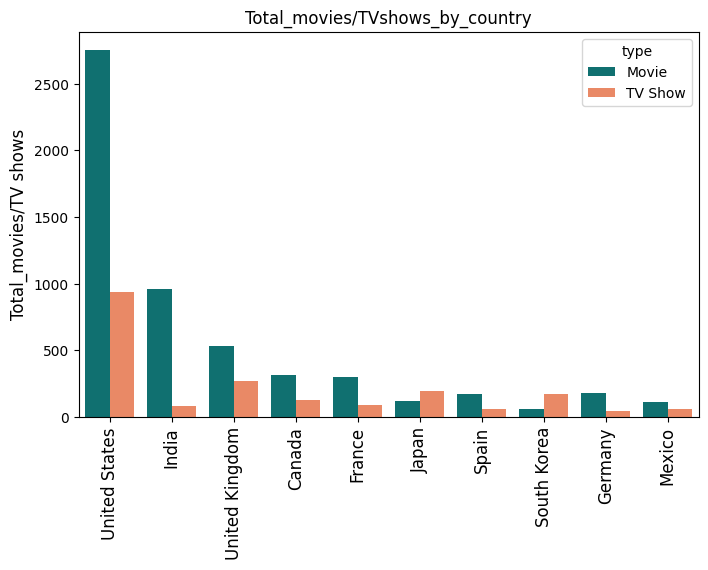

In [59]:
# Creating graphview of the above data.
plt.figure(figsize= (8,5))
sns.countplot(data = country_data , x = 'country' , order = top_10_country , hue = 'type', palette=['#008080', '#FF7F50'])
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('Total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

Observations:

1. USA, India, UK, Canada & France are the leading countries to produce the content available on Netflix.
2. Movies are the leading content added in all the top 10 countries except S. Korea where TV Shows are higher. Suspecting the rise and popularity of KDrama over the last 1-2 decades to be the reason for that.

Recommendations:

1. We should Promote these other 9 countries to produce more TV Shows since recently in the last 3 years the consumption of TV Shows are on rise
2. Creating various colaboration and offers/deals for directors/casts of these countries to create more TV Shows.
3. The data where the country name are unknown should be rectified for more precise analysis.
4. We should add "content rating" or "no. of times viewed" in the dataset/csv for a better understanding of the countries that are producing better content that is enjoyed by the subscribers of Netflix for better suggestions.



> Head Map to visualize content added across different years and months.



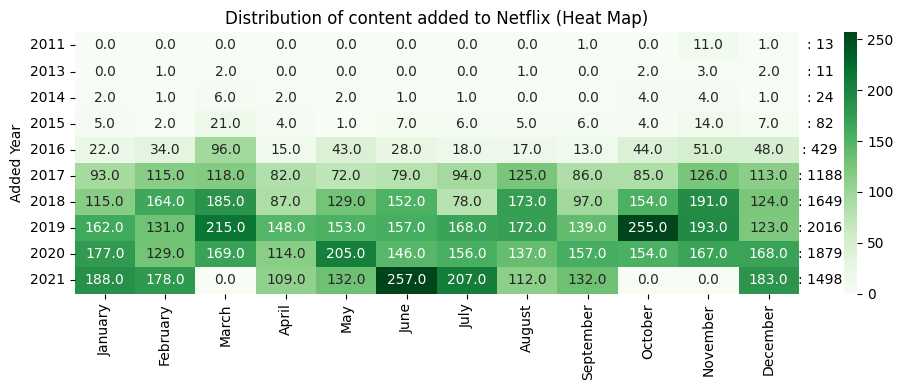

In [60]:
year_counts = date_table['added_year'].value_counts()
top_years = year_counts.head(10).index
filtered_df = date_table[date_table['added_year'].isin(top_years)]
added_data = filtered_df.groupby(['added_year', 'added_month']).size().unstack().fillna(0)

plt.figure(figsize=(10, 4))  # Set the figure size
sns.heatmap(added_data, cmap='Greens', annot=True, fmt=".1f")
plt.xlabel('')
plt.ylabel('Added Year')
plt.title('Distribution of content added to Netflix (Heat Map)')

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=np.arange(0.5, 12.5), labels=months)
for i, year in enumerate(added_data.index):
    plt.text(12.35, i + 0.5, f': {year_counts.loc[year]}', ha='center', va='center')

plt.tight_layout()
plt.show()

Observation:

1. We can see just like in the lineplot that the number of content added started increasing post 2014-2015 with the peak around 2019.
2. We can see that the content added is constently higher at the end of the year we can see some random spikes in middle like Mar 2019, May2020, June2021 etc.
3. We can also observe that there were no content added in March, Octomber & November in 2021. (Assuming the data entered in the csv is highly reliable)



> Mean Content added each months.



In [61]:
#considering only top 6 years as we can see in heat map that before 2016 the content added is very low
#and could greatly effect the mean count.
top_6years = year_counts.head(6).index
top_6year_data = date_table[date_table['release_year'].isin(top_6years)]

#Creating df for mean content added each months

month_graph = top_6year_data.groupby(['added_year' ,'added_month' ])['show_id'].count().reset_index()
month_graph_1 = month_graph.groupby('added_month')['show_id'].mean().round(2).reset_index()
month_graph_1.rename({'show_id' : 'mean movies/TV shows'}, axis = 1 , inplace = True)
month_graph_1['added_month'] = pd.Categorical(month_graph_1['added_month'], categories=months, ordered=True)
month_graph_1 = month_graph_1.sort_values('added_month')
month_graph_1

,added_month,mean movies/TV shows
4,January,68.50
3,February,66.67
7,March,70.29
0,April,83.17
8,May,76.17
6,June,85.17
5,July,86.00
1,August,79.00
11,September,82.83
10,October,93.80


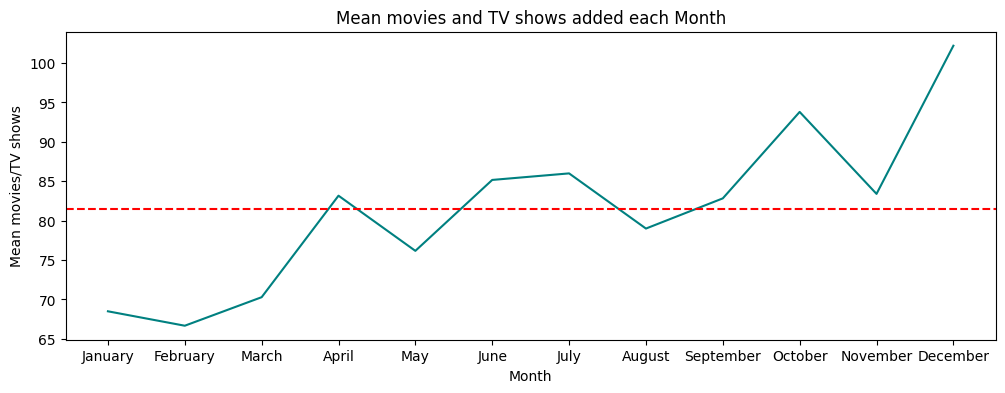

In [62]:
# Creating line plot for mean content added each months

plt.figure(figsize = (12,4))
sns.lineplot(data = month_graph_1 , x = 'added_month' , y = 'mean movies/TV shows' , ms = 6, color='teal')
plt.xlabel('Month' , fontsize = 10)
plt.ylabel('Mean movies/TV shows' , fontsize = 10)
plt.title('Mean movies and TV shows added each Month' , fontsize = 12)

mean_value = month_graph_1['mean movies/TV shows'].mean()
plt.axhline(mean_value, color='red', linestyle='--', label='Mean', linewidth=1.5)
plt.show()

> Mean Content added each weekdays.

In [63]:
#Creating df for mean content added on each weekdays

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_graph = top_6year_data.groupby(['added_year' ,'added_day' ])['show_id'].count().reset_index()
day_graph_1 = day_graph.groupby('added_day')['show_id'].mean().round(2).reset_index()
day_graph_1.rename({'show_id' : 'mean movies/TV shows'}, axis = 1 , inplace = True)
day_graph_1['added_day'] = pd.Categorical(day_graph_1['added_day'], categories=days, ordered=True)
day_graph_1 = day_graph_1.sort_values('added_day')
day_graph_1

,added_day,mean movies/TV shows
1,Monday,85.17
5,Tuesday,130.67
6,Wednesday,131.17
4,Thursday,133.67
0,Friday,315.83
2,Saturday,81.67
3,Sunday,55.00


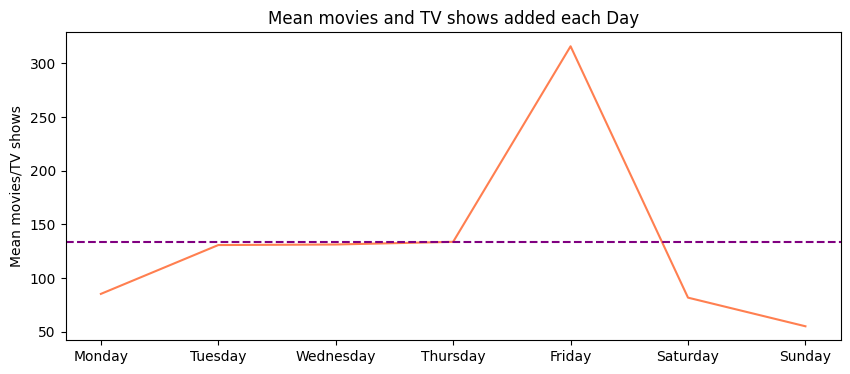

In [64]:
# Creating line plot for mean content added on each weekdays

plt.figure(figsize = (10,4))
sns.lineplot(data = day_graph_1 , x = 'added_day' , y = 'mean movies/TV shows' , ms = 6, color='coral')
plt.xlabel('')
plt.ylabel('Mean movies/TV shows' , fontsize = 10)
plt.title('Mean movies and TV shows added each Day' , fontsize = 12)

mean_value = day_graph_1['mean movies/TV shows'].mean()
plt.axhline(mean_value, color='purple', linestyle='--', label='Mean', linewidth=1.5)
plt.show()

Observations:

1. On Monthly analysis we can see number of content added is higher towards the year end. (i.e. Sept, Oct, Nov & Dec)
2. On Weekly analysis we can see number of content added is higher on Friday.

Rcommendations:

1. We can run promotional campaigns, discounts and offers in the month of Sept, Oct, Nov & Dec. This would boost the no. of new subscriber as people would be more tempted to buy subscription in these months as there are more new contents added. This could help us convert few of these subscriber into frequent subscribers.
2. We can introduce "weedend subscription" plan for Saturday & Sundays as contents are mostly added on weekdays specially on Friday. Also, people are free over the weekends and could enjoy the new contents. The price of these plan could be decided such that the amount is more than avg. cost per day of a monthly subscription.



> Content from each country [Pie Chart]



In [65]:
country_pie_data = country_table.copy()
country_pie_data = country_pie_data.drop(country_pie_data[country_pie_data['country'] == 'Unknown'].index)

country_pie_data['cat'] = country_pie_data['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

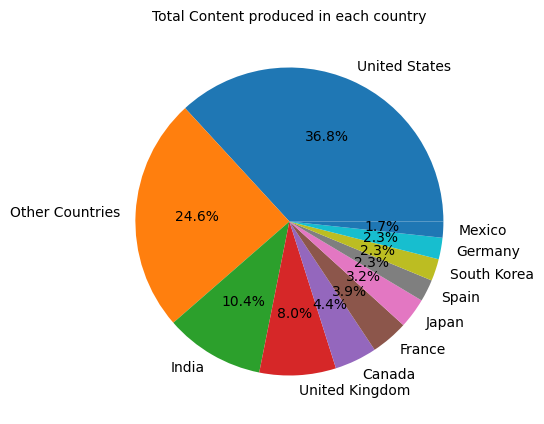

In [66]:
temp = country_pie_data.cat.value_counts()

plt.figure(figsize = (5,5))
plt.pie(temp , labels = temp.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 10)
plt.show()



> Top 10 Genre added on Netflix. [Movies & TV Shows Separate]



In [67]:
top_10_movie_genres = genre_table[genre_table['type'] == 'Movie'].listed_in.value_counts().head(10).index
top10_movie_data = genre_table.loc[genre_table['listed_in'].isin(top_10_movie_genres)]

top_10_TV_genres = genre_table[genre_table['type'] == 'TV Show'].listed_in.value_counts().head(10).index
top10_tv_data = genre_table.loc[genre_table['listed_in'].isin(top_10_TV_genres)]

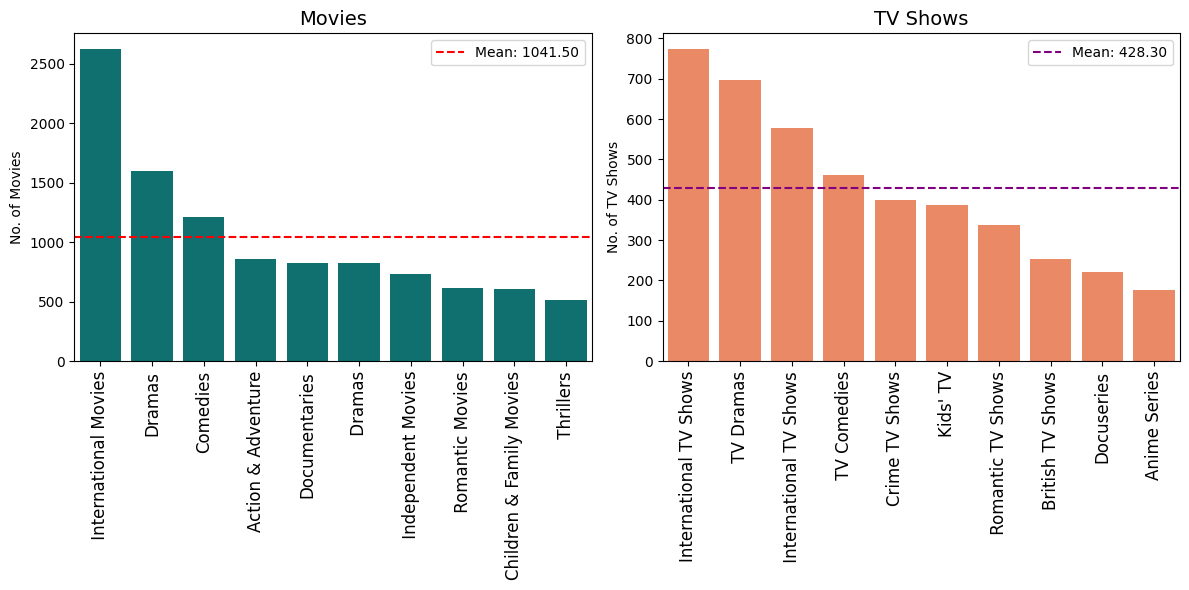

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=top10_movie_data, x='listed_in', order=top_10_movie_genres, ax=axes[0], color='teal' )
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Movies', fontsize=10)
axes[0].set_title('Movies', fontsize=14)
axes[0].tick_params(axis='x', rotation=90, labelsize=12)

mean_movies = top10_movie_data['listed_in'].value_counts()[top_10_movie_genres].mean()
axes[0].axhline(mean_movies, color='red', linestyle='--', label=f'Mean: {mean_movies:.2f}')
axes[0].legend()

sns.countplot(data=top10_tv_data, x='listed_in', order=top_10_TV_genres, ax=axes[1], color='Coral')
axes[1].set_xlabel('')
axes[1].set_ylabel('No. of TV Shows', fontsize=10)
axes[1].set_title('TV Shows', fontsize=14)
axes[1].tick_params(axis='x', rotation=90, labelsize=12)

mean_tv_shows = top10_tv_data['listed_in'].value_counts()[top_10_TV_genres].mean()
axes[1].axhline(mean_tv_shows, color='purple', linestyle='--', label=f'Mean: {mean_tv_shows:.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

Observation:

1. Top Genre in Movies are International Movies, Dramas & Comedies.
2. Top Genre in Movies are International TV Shows, TV Dramas & TV Comedies.

Suggestions:

1. We should add a metric column that could suggest us how much Netflix subscriber enjoy the content as suggested previously we should add "content rating" or "no. of times viewed"to help us with that analysis.
2. Based on those we could decide which Genre content on be added on Netflix.
3. Considering that the content added up until now are the ones enjoyed by our viewer we should add more content with International, Drama & Comedie genre for both Movies and TV Shows.



> Top 5 Genre in Top 10 Countries with highest content created.



In [69]:
gen_country = genre_table.merge(country_table , on = 'show_id').drop_duplicates()
gen_country = gen_country.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
gen_country.loc[gen_country['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = gen_country.loc[gen_country['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = gen_country.loc[gen_country['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)
top_5_genre


,country,listed_in,show_id
0,United States,Dramas,547
1,United States,Documentaries,487
2,United States,Comedies,406
3,United States,Action & Adventure,404
4,United States,Independent Movies,375
5,India,International Movies,826
6,India,Dramas,415
7,India,Comedies,271
8,India,Dramas,247
9,India,Independent Movies,166


Observation:

1. We can see top 5 Genre in the top 10 countries that have highest number of content added on Netflix.

Suggestions:

1. We could use this data to further niece down the genre of contents to be added as per each coutries. Considering that the content added up until now are the ones enjoyed by the viewer of those countries.



> Rating distribution of content added on Netflix. [Movies & TV Shows]



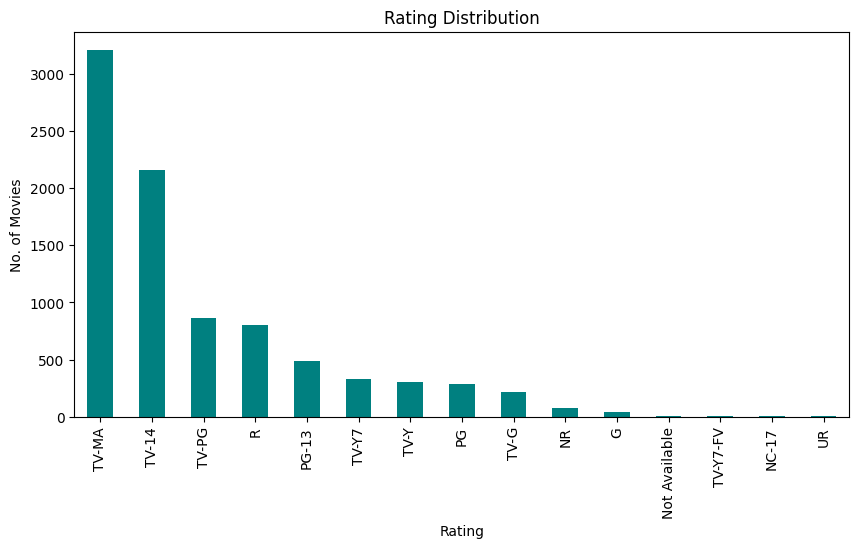

In [70]:
plt.figure(figsize=(10, 5))
df['rating'].value_counts().plot(kind='bar', color='teal')
plt.xlabel('Rating')
plt.ylabel('No. of Movies')
plt.title('Rating Distribution')
plt.show()

Observations:

1. Most of the Content added on Netflix are rated TV-MA, TV-14, TV-PG & R. Which on researching are 14+ Mature content.

Suggestions:

1. Netflix should also add underage content along with parental locks or should create a seperate application such as Netflix kids for targeting other audience and also being a house hold brand for content viewing.



> Duration distribution [Movies & TV Shows seperately]



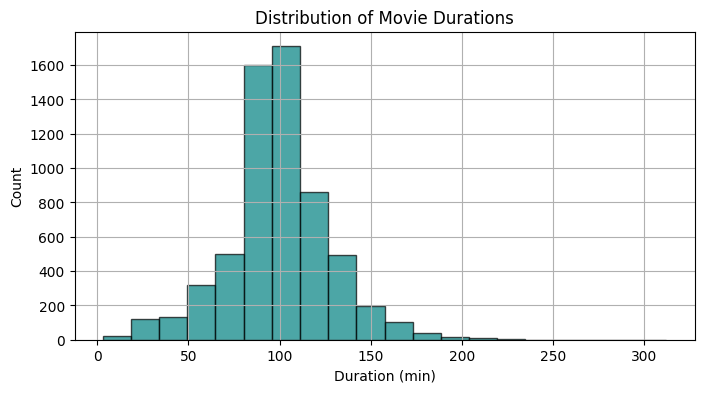

In [71]:
movies_1 = movies.copy()
movies_1['duration'] = movies_1['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(8, 4))
plt.hist(movies_1['duration'], bins=20, edgecolor='black', alpha=0.7, color='teal')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()

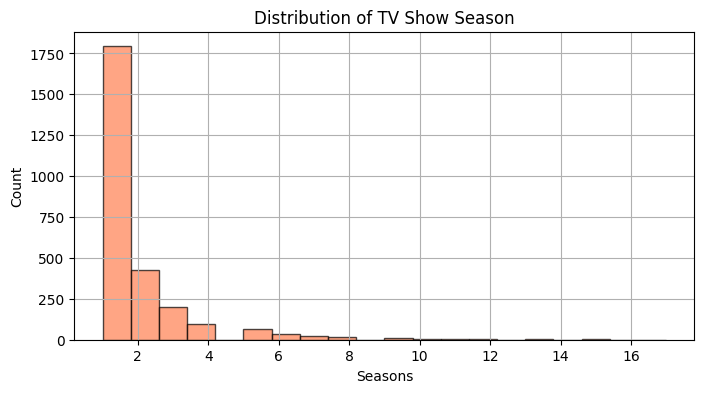

In [72]:
tv_shows_1 = tv_shows.copy()
tv_shows_1['duration'] = tv_shows_1['duration'].str.replace(r' Seasons?| Season', '', regex=True)
tv_shows_1['duration'] = tv_shows_1['duration'].astype(int)
plt.figure(figsize=(8, 4))
plt.hist(tv_shows_1['duration'], bins=20, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Distribution of TV Show Season')
plt.grid(True)
plt.show()

Observation:

1. We can observe that most of the movies added lies around 100 mins.
2. We can observe that most of the tv shows added have 1 season.

Suggestions:

1. We should add the suggested metrics for understanding how these contents are performing.
2. If they are performing good we should focus on adding and should suggest our partners and directors to create contents according to these.